In [1]:
!pip install tokenizer

In [2]:
#Insert progress bar when running long processes - nice!
from tqdm import tqdm 

#Getting data from Google Storage
import gcsfs

#Handling csv files
import csv

#Handling pickle files
import pickle

#Getting json into Pandas DF
import json
from pandas.io.json import json_normalize
import urllib.request, json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Pre-processing
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
import tokenizer

from nltk.corpus import stopwords
import nltk;  nltk.download('stopwords')
stop_words = stopwords.words('english')

from nltk.stem.snowball import SnowballStemmer

#from sklearn.preprocessing import MultiLabelBinarizer

#Feature Extraction/Engineering
import spacy
# nlp = spacy.load('en', disable=['parser', 'ner'])
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Model Building
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.adapt import MLkNN

#Model Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss

[nltk_data] Downloading package punkt to /Users/mindyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mindyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
unable to import 'smart_open.gcs', disabling that module




---




## INSTEAD OF STORING BUNCH OF HUGE FILES IN RAM, PROCESS ONE BY ONE SO BROWSER DOES NOT REFRESH

In [3]:
#if going url route, grab v8 .json using below call
#methods work; HTML path here is broken

# jsonurl = urllib.request.urlopen("https://storage.cloud.google.com/coronawhy/NLPDatasets/v7_preprocessed/v7_text.json")
# text = json.loads(jsonurl.read()) 

# text

In [4]:
#Another route: .json into pandas DF from Google Storage - This took a LONG time
# NLPData = pd.read_json('gs://coronawhy/NLPDatasets/v6_preprocessed/v6_text.json')
# NLPData 

In [5]:
#Put all files in a list to iterate through when reading .pkl as Pandas DF
pubs = ["v6_text_0.pkl", "v6_text_1.pkl", "v6_text_2.pkl", "v6_text_3.pkl", "v6_text_4.pkl", "v6_text_5.pkl", "v6_text_6.pkl", "v6_text_7.pkl", "v6_text_8.pkl", "v6_text_9.pkl", "v6_text_10.pkl", "v6_text_11.pkl", "v6_text_12.pkl", "v6_text_13.pkl", "v6_text_14.pkl", "v6_text_15.pkl", "v6_text_16.pkl", "v6_text_17.pkl", "v6_text_18.pkl", "v6_text_19.pkl"]

In [6]:
len(pubs)

20

In [7]:
#From each pub that is read in create a pandas data frame for each one
#Took around 10-15 min

def total_pubs(pubs):
   
  i = 0  
  while i < len(pubs):
    yield pd.read_pickle(pubs[i], 'gzip')    
    i += 1 
        
all_pubs = [i for i in total_pubs(pubs)] 

In [8]:
len(all_pubs) #Check that it is the length of original no. of files

20

In [9]:
#Combine all DF's

all_DFs = []
for i in range(0,20):
    all_DFs.append(all_pubs[i])

comb_DFs = pd.concat(all_DFs, ignore_index=True)
comb_DFs

,paper_id,language,section,sentence,lemma,UMLS,GGP,SO,TAXON,CHEBI,...,SIMPLE_CHEMICAL,ANATOMICAL_SYSTEM,IMMATERIAL_ANATOMICAL_ENTITY,MULTI-TISSUE_STRUCTURE,DEVELOPING_ANATOMICAL_STRUCTURE,ORGANISM_SUBDIVISION,CELLULAR_COMPONENT,PATHOLOGICAL_FORMATION,ORGANISM_SUBSTANCE,sentence_id
0,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"In Africa, there are no reports of H. influenz...","[in, Africa, ,, there, be, no, report, of, h.,...","[Africa, Haemophilus influenzae, Stickler synd...",[],[],[],[],...,[β-lactamase],[],[],[],[],[],[],[],[],94fc00bfd9a
1,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"In Oceania, In Oceania, H. influenzae isolates...","[in, Oceania, ,, in, Oceania, ,, h., influenza...","[Oceania <genus>, Oceania <genus>, Haemophilus...",[],[],[],[],...,[β-lactamase],[],[],[],[],[],[],[],[],94fc01bfd9a
2,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"Similarly, in New Zealand, 95% of OM-related H...","[similarly, ,, in, New, Zealand, ,, 95, %, of,...","[New Zealand, Haemophilus influenzae, Muscle s...",[],[],[],[],...,[],[],[],[],[],[],[],[],[],94fc02bfd9a
3,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"[86, 87] or was recommended for high risk grou...","[[, 86, ,, 87, ], or, be, recommend, for, high...","[high-risk group, Mexico, DUOXA1 gene]",[NIP],[],[],[],...,[],[],[],[],[],[],[],[],[],94fc03bfd9a
4,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"Furthermore, the introduction of PCV7 into NIP...","[furthermore, ,, the, introduction, of, pcv7, ...","[Introduction procedure, DUOXA1 gene, high-ris...",[NIP],"[region, region]",[],[],...,[OM],[],[],[],[],[],[],[],[],94fc04bfd9a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488464,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,Surveillance is largely passive in relying on ...,"[surveillance, be, largely, passive, in, rely,...","[Medical Surveillance, Passive, Reporting, Inf...",[],[wild and],[human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705853d08e
7488465,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,The major concern is to detect human-to-human ...,"[the, major, concern, be, to, detect, human-to...","[Detected (finding), disease transmission, Dis...",[],[],[human-to-human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705863d08e
7488466,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,International efforts to improve national and ...,"[international, effort, to, improve, national,...","[International, Improved, Federal Government, ...",[],[],[animal-to-human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705873d08e
7488467,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,An integral part of the pandemic planning resp...,"[an, integral, part, of, the, pandemic, planni...","[Pandemics, United Kingdom, potential, Homo sa...",[],[],[human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705883d08e


In [10]:
#Get relevant columns
NLPData = comb_DFs[['paper_id','sentence']]
NLPData

,paper_id,sentence
0,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"In Africa, there are no reports of H. influenz..."
1,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"In Oceania, In Oceania, H. influenzae isolates..."
2,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"Similarly, in New Zealand, 95% of OM-related H..."
3,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"[86, 87] or was recommended for high risk grou..."
4,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"Furthermore, the introduction of PCV7 into NIP..."
...,...,...
7488464,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,Surveillance is largely passive in relying on ...
7488465,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,The major concern is to detect human-to-human ...
7488466,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,International efforts to improve national and ...
7488467,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,An integral part of the pandemic planning resp...


In [11]:
#Group rows by paper_id creating txt at doc level then renaming "sentence" column to pub_text
NLPData = NLPData.dropna()
NLPData = NLPData.groupby('paper_id')['sentence'].apply(' '.join).reset_index()
NLPData.columns = ['paper_id', 'paper_txt']
NLPData

,paper_id,paper_txt
0,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...
1,00016663c74157a66b4d509d5c4edffd5391bbe0,[] Viruses are increasingly recognised as path...
2,0005d253951fedc237715a37db147032eea28912,[] Synthesized by William Prusoff in the late ...
3,000affa746a03f1fe4e3b3ef1a62fdfa9b9ac52a,Correlation between antimicrobial consumption ...
4,000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...
...,...,...
36483,fff60988428b82658458d381a6c27583209a686e,Development of A Loop-Mediated Isothermal Ampl...
36484,fff6fe12beb51ee2641ddb5381378ff3560d8103,Health shocks and their long-lasting impact on...
36485,fff6febdd287d474d7950b14faa899c4095557b3,"[] pneumonia had not been the ""friend of the a..."
36486,fffaed7e9353b7df6c4ca8f66b62e117013cb86d,Dengue Virus Glycosylation: What Do We Know? I...


In [15]:
# NLPData['paper_txt'][0] #Check.

In [20]:
#Pull in annotation dataset with timestamp of **04.12.20, rename columns, drop unnecessary columns.
df2 = pd.read_csv('Study_Design_Annotation_Snapshot_4_12_20.csv')
df2.columns = ['Assignee',
 'cord_uid',
 'sha',
 'title',
 'url',
 'in silico',
 'in vitro',
 'in vivo',
 'Systematic review or meta-analysis of RCTs',
 'RCT',
 'Non-randomized controlled trial',
 'Comparative study',
 'Descriptive study',
 'Systematic review or meta-analysis of studies other than RCTs',
 'Other ',
 'General Notes']
df2 = df2.drop(columns=[
 'Assignee',
 'cord_uid',
 'title',
 'url',
'General Notes'])
df2.head()

,sha,in silico,in vitro,in vivo,Systematic review or meta-analysis of RCTs,RCT,Non-randomized controlled trial,Comparative study,Descriptive study,Systematic review or meta-analysis of studies other than RCTs,Other
0,f0dd0852e4b1b5ccb3add01fc3aa561478b8be89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of previous studies incl...
1,a484db449f6d41927b645a3d5bcdd1ada691e694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,862dbb7e5c850f946575d3c882f46be61d139a22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of literature surroundin...
3,8acb82e7915763480c44bce48a261d1a3199cda0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of literature surroundin...
4,f6fdeab5faa3141b4d0ba262210e6662a7aa261a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of particular proteosome...


In [ ]:
df2.iloc[1:]

In [ ]:
#Clean up Annotations dataset by turning NaN's to 0 and Other column to 0/1
df2 = df2.iloc[1:]
df2 = df2.dropna(how='all',subset=
[
 'sha',
 'title',
 'url',
 'in silico',
 'in vitro',
 'in vivo',
 'Systematic review or meta-analysis of RCTs',
 'RCT',
 'Non-randomized controlled trial',
 'Comparative study with a concurrent or historical comparator (cohort studies, case-control studies, 2 or more single-arm studies, or interrupted time series with a control group)',
 'Descriptive study without a comparator (single-arm pre-post studies, case series, case reports)',
 'Systematic review or meta-analysis of studies other than RCTs',
 'Other ',
 'General Notes'])
df2 = df2.drop(['General Notes'], axis=1)
df2.fillna(0,inplace=True)
df2

In [ ]:
#Initial work of for text preprocessing fxn

#Lowercase all letters, get rid of punctuation, get rid of extra spaces on left and right side of string
# NLPData2['text'] = NLPData2['text'].map(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)).strip())
# NLPData2['text'][0] #got rid of abbreviations as well!

#Remove non-ASCII characters
# NLPData2['text'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
# NLPData2['text'][0]

#Tokenize
# NLPData2['text'] = NLPData2['text'].map(lambda x: x.split())
# NLPData2['text']

# Remove stop words
# stop_words = stopwords.words('english')
# NLPData2['text'] = NLPData2['text'].apply(lambda x: [item for item in x if item not in stop_words])
# NLPData2['text']

#Turn lists into string to lemmatize on string
# NLPData2['text'] = NLPData2['text'].apply(', '.join)
# NLPData2['text']

#Lemmatize
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
    
#     doc = nlp(texts) 
#     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out
# NLPData2['text']=NLPData2['text'].map(lambda x: lemmatization(x))
# NLPData2['text']

#Rejoin words --> list of words to huge string with words
# from itertools import chain
# NLPData2['text']=NLPData2.text.map(lambda x: list(chain.from_iterable(x)))
# NLPData2['text']=NLPData2['text'].apply(' '.join)
# NLPData2['text'][0]

In [13]:
#All pre-Processings steps into function to encapsulate logic

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#   """https://spacy.io/api/annotation"""
#   texts_out = []
    
#   doc = nlp(texts) 
#   texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#   return texts_out

def preprocess(textCol):
  textCol=textCol.map(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)).strip())
  textCol.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
  textCol=textCol.map(lambda x: x.split())
  stop_words = stopwords.words('english')
  textCol = textCol.apply(lambda x: [item for item in x if item not in stop_words])
  textCol = textCol.apply(' '.join) #comma in between words needs to be added back in if lemmatization is used to tokenize words

#   nlp.max_length = 1400000 #might need to remove lemmatization

#   textCol=textCol.map(lambda x: lemmatization(x))
#   textCol=textCol.map(lambda x: list(chain.from_iterable(x)))
#   textCol=textCol.apply(' '.join) 
  return textCol

NLPData['sentence'] = preprocess(NLPData['sentence'])
NLPData['sentence']

0        absence, surface, expression, feline, infectio...
1        viruses, increasingly, recognised, pathogens, ...
2        synthesized, william, prusoff, late, 1950s, id...
3        correlation, antimicrobial, consumption, incid...
4        supplementary, information, ecoepidemiological...
                               ...                        
36483    development, loopmediated, isothermal, amplifi...
36484    health, shocks, longlasting, impact, health, b...
36485    pneumonia, friend, aged, nuland, observed, lar...
36486    dengue, virus, glycosylation, know, many, infe...
36487    history, protein, crystallography, china, chin...
Name: sentence, Length: 36488, dtype: object

In [14]:
NLPData.head() #Check

,paper_id,sentence
0,0001418189999fea7f7cbe3e82703d71c85a6fe5,"absence, surface, expression, feline, infectio..."
1,00016663c74157a66b4d509d5c4edffd5391bbe0,"viruses, increasingly, recognised, pathogens, ..."
2,0005d253951fedc237715a37db147032eea28912,"synthesized, william, prusoff, late, 1950s, id..."
3,000affa746a03f1fe4e3b3ef1a62fdfa9b9ac52a,"correlation, antimicrobial, consumption, incid..."
4,000b7d1517ceebb34e1e3e817695b6de03e2fa78,"supplementary, information, ecoepidemiological..."


,Assignee,cord_uid,sha,title,url,in silico,in vitro,in vivo,Systematic reivew or meta-analysis of RCTs,RCT,Non-randomized controlled trial,"Comparative study with a concurrent or historical comparator (cohort studies, case-control studies, 2 or more single-arm studies, or interrupted time series with a control group)","Descriptive study without a comparator (single-arm pre-post studies, case series, case reports)",Systematic review or meta-analysis of studies other than RCTs,Other
1,Zayd,480bzpi1,a484db449f6d41927b645a3d5bcdd1ada691e694,Do we have enough evidence how seasonal influe...,https://doi.org/10.1016/j.vaccine.2016.04.096,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0
2,Zayd,n5o7u56f,862dbb7e5c850f946575d3c882f46be61d139a22,Bioactive principles from Cordyceps sinensis: ...,https://doi.org/10.1016/j.jff.2013.04.018,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,Non-systematic review of literature surroundin...
3,Zayd,8rl4kswe,8acb82e7915763480c44bce48a261d1a3199cda0,Virus Entry: Open Sesame,https://doi.org/10.1016/j.cell.2006.02.007,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,Non-systematic review of literature surroundin...
4,Zayd,whfyczcj,f6fdeab5faa3141b4d0ba262210e6662a7aa261a,Hijacking of the Ubiquitin/Proteasome Pathway ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,Non-systematic review of particular proteosome...
5,Zayd,y8z0pwgn,8c71f856263c447ba7983e1f7087259008ca8505,A permanent host shift of rabies virus from Ch...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,dxl7wvcx,f14e7b5fff3c2ac074e61beacf4fb1bba524e438,Anti-Inflammatory and Anti-Allergic Activities...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
996,0,ldfa616a,0660d9281c1607ca1ca9cb62dfa00b56f49ddee1,The Last Ten Years of Advancements in Plant-De...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
997,0,8y3iuqn4,0f5888442a92665b65f719dac5712fd287f842b8,Gaseous pollutant transmission through windows...,https://doi.org/10.1016/j.enbuild.2017.08.025,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
998,0,ubp6hhpo,370d59bf7f643eb4a7f419b7cf31b3b67c6e0b13,Biological characteristics and propagation of ...,https://doi.org/10.1016/j.virol.2012.11.002,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [305]:
cw_final = NLPData.merge(df2, how='inner', left_on='paper_id', right_on='sha')
cw_final

,paper_id,sentence,Assignee,cord_uid,sha,title,url,in silico,in vitro,in vivo,Systematic reivew or meta-analysis of RCTs,RCT,Non-randomized controlled trial,"Comparative study with a concurrent or historical comparator (cohort studies, case-control studies, 2 or more single-arm studies, or interrupted time series with a control group)","Descriptive study without a comparator (single-arm pre-post studies, case series, case reports)",Systematic review or meta-analysis of studies other than RCTs,Other
0,002faa16056227423f9d108d01f0dae31491510c,"onsite, influenza, vaccination, arrangements, ...",0,38tajokl,002faa16056227423f9d108d01f0dae31491510c,On-site influenza vaccination arrangements imp...,https://doi.org/10.1016/j.ajic.2006.10.007,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,0087db1b3fdc81bb42d1fc625fc202c881dd9b9f,"fiv, infection, il2dependent, independent, fel...",0,rvj1ssfp,0087db1b3fdc81bb42d1fc625fc202c881dd9b9f,FIV infection of IL-2-dependent and -independe...,https://doi.org/10.1016/s0165-2427(98)00162-7,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,00b88130d2a7c8489e209742494303b6731d7544,"recombinant, baculovirus, expressing, frcova, ...",0,2behvv3b,00b88130d2a7c8489e209742494303b6731d7544,Recombinant baculovirus expressing the FrC-OVA...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0
3,0116dea9b6d4c58748d1a38b69b4fe6e06868aa4,"heterogeneity, plasticity, porcine, alveolar, ...",0,6jittbis,0116dea9b6d4c58748d1a38b69b4fe6e06868aa4,Heterogeneity and plasticity of porcine alveol...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,012d67a440ec30896e8c89c67a736c2638512be1,"inhibition, enterovirus, 71, infection, antise...",0,569a86u3,012d67a440ec30896e8c89c67a736c2638512be1,Inhibition of enterovirus 71 infection by anti...,https://doi.org/10.1016/j.antiviral.2014.04.004,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,fed900e545d163ace2bd198f44d0e87375310739,"ultrastructure, human, nasal, epithelium, epis...",0,4od8qt36,fed900e545d163ace2bd198f44d0e87375310739,Ultrastructure of human nasal epithelium durin...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
934,fee63d10e8db56b72c9385149a4e57afa8500981,"polymorphisms, feline, tnfa, cd209, genes, ass...",0,x4fkja38,fee63d10e8db56b72c9385149a4e57afa8500981,Polymorphisms in the feline TNFA and CD209 gen...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0
935,ff9d9713206da30022af4f9095058368eeb1f3f8,"new, decade, veterinary, research, societal, r...",0,rmv3y6w7,ff9d9713206da30022af4f9095058368eeb1f3f8,A New Decade of Veterinary Research: Societal ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1
936,ffd0af549110e997ac78508b499668e31e3b5b90,"molecular, characteristics, novel, strain, can...",0,ttb7o8lv,ffd0af549110e997ac78508b499668e31e3b5b90,Molecular characteristics of a novel strain of...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


____

In [104]:
#Checking for class imbalance - our dataset
df2_an = df2.iloc[:,5:]
df2_an.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 10 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   in silico                                                                                                                                                                           999 non-null    float64
 1   in vitro                                                                                                                                                                            999 non-null    float64
 2   in vivo                                               

In [208]:
cols = df2_an.select_dtypes(exclude=['float']).columns

df2_an[cols] = df2_an[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [210]:
df2_an.info() #verfied that obj columns turned to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 10 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   in silico                                                                                                                                                                           999 non-null    float64
 1   in vitro                                                                                                                                                                            999 non-null    float64
 2   in vivo                                               

In [216]:
list(df2_an)

['in silico',
 'in vitro',
 'in vivo',
 'Systematic reivew or meta-analysis of RCTs',
 'RCT',
 'Non-randomized controlled trial',
 'Comparative study with a concurrent or historical comparator (cohort studies, case-control studies, 2 or more single-arm studies, or interrupted time series with a control group)',
 'Descriptive study without a comparator (single-arm pre-post studies, case series, case reports)',
 'Systematic review or meta-analysis of studies other than RCTs',
 'Other ']

In [220]:
#Due to columns with obj's can't compute sum aggregation so will separate these col's out, remove non-int items and then sum
df2_cols = list(df2_an)
for i in df2_cols:
    print((i),df2_int[i].sum())

in silico 28.0
in vitro 129.0
in vivo 79.0
Systematic reivew or meta-analysis of RCTs 9.0
RCT 9.0
Non-randomized controlled trial 10.0


KeyError: 'Comparative study with a concurrent or historical comparator (cohort studies, case-control studies, 2 or more single-arm studies, or interrupted time series with a control group)'

In [217]:
df2_an["Comparative study with a concurrent or historical comparator (cohort studies, case-control studies, 2 or more single-arm studies, or interrupted time series with a control group)"].sum()

28.0

In [221]:
df2_an["Descriptive study without a comparator (single-arm pre-post studies, case series, case reports)"].sum()

64.0

In [222]:
df2_an["Systematic review or meta-analysis of studies other than RCTs"].sum()

23.0

In [219]:
df2_an["Other "].sum()

28.0

In [83]:
#Kaggle datset labels

# 0 - Other
# 1 - Meta analysis
# 2 - Randomized control trial
# 3 - Non-randomized trial
# 4 - Prospective cohort
# 5 - Time-series analysis
# 6 - Retrospective cohort
# 7 - Cross-sectional
# 8 - Case control
# 9 - Case study
# 10 - Simulation


kaggleLabels = pd.read_csv("design.csv")

labels = range(0,11)
columns = ['Other', 'Meta analysis', 'Randomized control trial', 'Non-randomized trial', 'Prospective cohort', 'Time-series analysis', 'Retrospective cohort', 'Cross-sectional', 'Case control', 'Case study', 'Simulation']
mapped = dict(zip(labels,columns))
kaggleLabels['label'] = kaggleLabels['label'].map(mapped) 
kaggleLabels.head()

,label,id
0,Other,011a5689fc64dc1c3c80ebe4f5fb7c941260e03d
1,Other,016cc0c4d5d021dcbecbc48cb712aa36032c357f
2,Other,017e15067c278511f7692b27cec24caa399eb6d2
3,Other,02a4ac0861705cad16476313ecf2ea1595c12043
4,Other,03cda737465b68fbf1a76dafe2e3788961f986be


In [53]:
kaggleclasses = NLPData.merge(kaggleLabels, how='inner', left_on='paper_id', right_on='id')
kaggleclasses

,paper_id,sentence,label,id
0,001d8d54a7e73e761f779c81661595cc5ae2ca08,"intervention, time, series, analysis, crime, r...",Time-series analysis,001d8d54a7e73e761f779c81661595cc5ae2ca08
1,0043d044273b8eb1585d3a66061e9b4e03edc062,"evaluation, tuberculosis, programme, ningxia, ...",Case study,0043d044273b8eb1585d3a66061e9b4e03edc062
2,00911cf4f99a3d5ae5e5b787675646a743574496,"cheer, hierarchical, taxonomic, classification...",Simulation,00911cf4f99a3d5ae5e5b787675646a743574496
3,00951716e01c8e0cc341770389fc38d1b5455210,"knowledge, attitudes, toward, preventive, prac...",Cross-sectional,00951716e01c8e0cc341770389fc38d1b5455210
4,012debf5a240a496518af146ddfc16c958339c2b,"preparedness, response, diseases, epidemic, po...",Case study,012debf5a240a496518af146ddfc16c958339c2b
...,...,...,...,...
734,ff08601026bfcad65343aeac47487be948da1985,"journal, preproof, physical, exercise, therapy...",Other,ff08601026bfcad65343aeac47487be948da1985
735,ff365ebbc0fc55476886b0abd129e227c1f8a527,"article, focus, hip, report, systematic, revie...",Meta analysis,ff365ebbc0fc55476886b0abd129e227c1f8a527
736,ff4fffe02138b0b232334d997965d11fd936916b,"bmc, medicine, rna, viruses, communityacquired...",Cross-sectional,ff4fffe02138b0b232334d997965d11fd936916b
737,ff849fc6eb55db14fe29a58c4b982f938eeb2e32,"arthroscopy, arthroscopy, techniques, arthrosc...",Other,ff849fc6eb55db14fe29a58c4b982f938eeb2e32


In [56]:
kaggleclasses.groupby('label').size().sort_values(ascending=False)

label
Simulation                  130
Other                       114
Cross-sectional             102
Case study                   97
Meta analysis                60
Randomized control trial     57
Prospective cohort           50
Retrospective cohort         49
Time-series analysis         45
Case control                 32
Non-randomized trial          3
dtype: int64

____

For Kaggle dataset, there is 1 label/pub. Need to verify that each row has distinct pub.

In [129]:
kaggleLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1188 non-null   object
 1   id      1187 non-null   object
dtypes: object(2)
memory usage: 18.7+ KB


In [133]:
pubs_count = kaggleLabels.groupby(['id']).count()
pubs_count.sort_values(['label'],ascending = False).head(10)

,label
id,
001d8d54a7e73e761f779c81661595cc5ae2ca08,1
ab813c20d0a32c62badc1515752122b1a268f36d,1
aafa6cdfe96a5cdaf7b7c2f04b11a5dbdd73b2df,1
aae1603af1bb84087248441716a5c0bd373603b7,1
aad21b34e531ce8d54e35fa1c6c82c9ccba7ae47,1
aaca0a72b59c900b2444576e7381b28acf683b88,1
aac65c7f71a49d05c3cdbdcf0811cd0ff98d2d23,1
aab8259cf3330a0e6d48218b13615fc684b5c016,1
aaa855d6d7a2a66647e1359bf2d7b472489785fb,1


Confirmed that all publications are unique. Now merge with NLPdata. (Remember: NLPData merged with CoronaWhy annotations produced 938 matches. Let's see what we get with Kaggle's annotations.

In [134]:
kaggle_final = NLPData.merge(kaggleLabels, how='inner', left_on='paper_id', right_on='id')
kaggle_final

,paper_id,sentence,label,id
0,001d8d54a7e73e761f779c81661595cc5ae2ca08,"intervention, time, series, analysis, crime, r...",Time-series analysis,001d8d54a7e73e761f779c81661595cc5ae2ca08
1,0043d044273b8eb1585d3a66061e9b4e03edc062,"evaluation, tuberculosis, programme, ningxia, ...",Case study,0043d044273b8eb1585d3a66061e9b4e03edc062
2,00911cf4f99a3d5ae5e5b787675646a743574496,"cheer, hierarchical, taxonomic, classification...",Simulation,00911cf4f99a3d5ae5e5b787675646a743574496
3,00951716e01c8e0cc341770389fc38d1b5455210,"knowledge, attitudes, toward, preventive, prac...",Cross-sectional,00951716e01c8e0cc341770389fc38d1b5455210
4,012debf5a240a496518af146ddfc16c958339c2b,"preparedness, response, diseases, epidemic, po...",Case study,012debf5a240a496518af146ddfc16c958339c2b
...,...,...,...,...
734,ff08601026bfcad65343aeac47487be948da1985,"journal, preproof, physical, exercise, therapy...",Other,ff08601026bfcad65343aeac47487be948da1985
735,ff365ebbc0fc55476886b0abd129e227c1f8a527,"article, focus, hip, report, systematic, revie...",Meta analysis,ff365ebbc0fc55476886b0abd129e227c1f8a527
736,ff4fffe02138b0b232334d997965d11fd936916b,"bmc, medicine, rna, viruses, communityacquired...",Cross-sectional,ff4fffe02138b0b232334d997965d11fd936916b
737,ff849fc6eb55db14fe29a58c4b982f938eeb2e32,"arthroscopy, arthroscopy, techniques, arthrosc...",Other,ff849fc6eb55db14fe29a58c4b982f938eeb2e32


Interesting...Kaggle annotation produced 739 matches whereas CoronaWhy annotations produced 938 matches. Definitely will need to have mixed annotations combined with NLPData DF.

# Mapping CoronaWhy Annotations to Kaggle Annotations

1. determine which pub's in Kaggle dataset are not in CoronaWhy
2. For those in CoronaWhy that are not in Kaggle add annotation

In [169]:
#TO BE CONTINUED...
# uncommon = cw_final["paper_id"].merge(kaggle_final["paper_id"], how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
# uncommon

# Split Dataset into Training and Test Set (80/20 Split) and Feature Engineering

In [306]:
cw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 0 to 937
Data columns (total 17 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   paper_id                                                                                                                                                                            938 non-null    object 
 1   sentence                                                                                                                                                                            938 non-null    object 
 2   Assignee                                              

In [307]:
cols = y_train.select_dtypes(exclude=['float']).columns

y_train[cols] = y_train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [308]:
cols = y_test.select_dtypes(exclude=['float']).columns

y_test[cols] = y_test[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [309]:
train, test = train_test_split(cw_final, random_state=42, test_size=0.20, shuffle=True)

## Dataset Split

In [310]:
x_train = train["sentence"]
y_train = train.iloc[:,7:]
x_test = test["sentence"]
y_test = test.iloc[:,7:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750,), (750, 10), (188,), (188, 10))

## Feature Engineering

In [311]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), norm='l2', max_features = 10000)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)
X_train.shape, X_test.shape

((750, 10000), (188, 10000))

In [312]:
#SEE IF NEED TO CALL THIS AGAIN AFTER SECOND ITERATION
cols = y_train.select_dtypes(exclude=['float']).columns

y_train[cols] = y_train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

# Train Model

In [323]:
y_train #There is 124 NaN's in Other category. Need to impute to 0

in silico                                                                                                                                                                               0
in vitro                                                                                                                                                                                0
in vivo                                                                                                                                                                                 0
Systematic reivew or meta-analysis of RCTs                                                                                                                                              0
RCT                                                                                                                                                                                     0
Non-randomized controlled trial                                       

In [324]:
y_train = y_train.fillna(0)

In [325]:
y_train.isnull().sum()

in silico                                                                                                                                                                             0
in vitro                                                                                                                                                                              0
in vivo                                                                                                                                                                               0
Systematic reivew or meta-analysis of RCTs                                                                                                                                            0
RCT                                                                                                                                                                                   0
Non-randomized controlled trial                                                 

In [326]:
classifier = ClassifierChain(LogisticRegression(C=1))
#For classifier chain to run, need to take out all labels = 0 for y_train and y_test. 

selected_labels = y_train.columns[y_train.sum(axis = 0, skipna = True) > 0].tolist() #only >0 label values in each label column

y_train = y_train.filter(selected_labels, axis=1) 
y_test = y_test.filter(selected_labels, axis=1)  

classifier.fit(X_train, y_train)

ClassifierChain(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                cv=None, order=None, random_state=None)

In [342]:
# Run Model on Test Set

predictions = classifier.predict_proba(X_test)

# Assessing Model Performance

In [346]:
#Once again, need to deal with NaN's in label set (y_test)

y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 70 to 817
Data columns (total 10 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   in silico                                                                                                                                                                           188 non-null    float64
 1   in vitro                                                                                                                                                                            188 non-null    float64
 2   in vivo                                              

In [ ]:
#Problem is that Other column is object. Need to transform to float. - Again...CHECK THIS AFTER SECOND ITERATION

In [349]:
cols = y_test.select_dtypes(exclude=['float']).columns

y_test[cols] = y_test[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [350]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 70 to 817
Data columns (total 10 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   in silico                                                                                                                                                                           188 non-null    float64
 1   in vitro                                                                                                                                                                            188 non-null    float64
 2   in vivo                                              

In [353]:
y_test = y_test.fillna(0)

t = 0.05
Accuracy =  0.0
F1 =  0.19165378670788252
Hamming loss =  0.2781914893617021
t = 0.06
Accuracy =  0.02127659574468085
F1 =  0.20042643923240935
Hamming loss =  0.19946808510638298
t = 0.07
Accuracy =  0.03723404255319149
F1 =  0.20936639118457298
Hamming loss =  0.15265957446808512
t = 0.08
Accuracy =  0.06914893617021277
F1 =  0.1619718309859155
Hamming loss =  0.12659574468085105
t = 0.09
Accuracy =  0.0797872340425532
F1 =  0.16666666666666666
Hamming loss =  0.12234042553191489
t = 0.1
Accuracy =  0.0797872340425532
F1 =  0.16666666666666666
Hamming loss =  0.12234042553191489
t = 0.11
Accuracy =  0.10106382978723404
F1 =  0.17100371747211898
Hamming loss =  0.11861702127659575
t = 0.12
Accuracy =  0.18617021276595744
F1 =  0.13973799126637554
Hamming loss =  0.10478723404255319
t = 0.13
Accuracy =  0.4627659574468085
F1 =  0.1267605633802817
Hamming loss =  0.06595744680851064
t = 0.14
Accuracy =  0.5638297872340425
F1 =  0.0
Hamming loss =  0.05319148936170213
t = 0.15
A

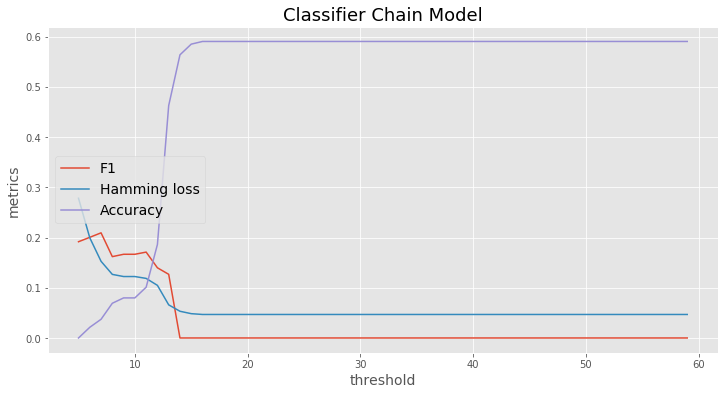

In [356]:
# Assess Performance of Model (Accuracy (mention class imbalance if there is), F1-Score, Hamming Loss) and Report Results to Imran
#for plotting metrics as a function of threshold
th = []
f = []
ham = []
ac = []
for t in range(5,60): # threshold value
    y_pred_new = (predictions >= t/100).astype(int)
    print("t =" ,t/100)
    print("Accuracy = ",accuracy_score(y_test,y_pred_new))
    print("F1 = ",f1_score(y_test,y_pred_new, average="micro")) #f1_score @ micro means to calculate metrics globally by counting the total true positives, false negatives and false positives
    print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classifier Chain Model", fontsize = 18)
plt.show()

Most optimal threshold is when F1 is high, Hamming Loss is low and Accuracy increases. According to this graph, hard to tell. Though Accuracy increases and Hamming Loss descreases at around 12, F1 is approximately .12. This is not that great since want F1 score near 1. Next step would be to work on Feature Engineering and Model tuning/trying other models like OneVsRest or Binary Relevance.